In [2]:
# extracting the compressed dataset
from zipfile import ZipFile

dataset = '/content/ant_bee_images.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [3]:
import os
# counting the number of files in train folder
path, dirs, files = next(os.walk('/content/ant_bee_images'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  394


Printing the name of images

In [4]:
file_names = os.listdir('/content/ant_bee_images')
print(file_names)

['ant 105.jpg', 'bee (46).jpg', 'ant (72).jpg', 'ant (112).jpg', 'ant (65).jpg', 'ant (4).jpg', 'ant (9).jpg', 'bee (197).jpg', 'ant (84).jpg', 'ant (135).jpg', 'ant (142).jpg', 'ant (36).jpg', 'ant (89).jpg', 'bee (188).jpg', 'bee (123).jpg', 'ant (119).jpg', 'ant (176).jpg', 'bee (7).jpg', 'ant (131).jpg', 'ant (29).jpg', 'bee (100).jpg', 'bee (156).jpg', 'bee (190).jpg', 'ant (160).jpg', 'bee (67).jpg', 'ant (42).jpg', 'ant (21).jpg', 'ant (100).jpg', 'bee (186).jpg', 'ant 117.jpg', 'bee (90).jpg', 'bee (172).jpg', 'bee (10).jpg', 'bee 119.jpg', 'ant.jpg', 'bee 123.jpg', 'ant (61).jpg', 'bee (14).jpg', 'ant (58).jpg', 'bee (79).jpg', 'ant (156).jpg', 'bee (92).jpg', 'ant (39).jpg', 'bee (141).jpg', 'bee (55).jpg', 'ant (172).jpg', 'ant (49).jpg', 'bee (35).jpg', 'bee (167).jpg', 'ant (180).jpg', 'bee (121).jpg', 'ant (144).jpg', 'ant (104).jpg', 'bee (180).jpg', 'bee (137).jpg', 'ant (41).jpg', 'ant (140).jpg', 'bee (74).jpg', 'bee 133.jpg', 'ant (3).jpg', 'ant (47).jpg', 'bee (70).

Importing the Dependencies

In [5]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from google.colab.patches import cv2_imshow

Displaying the images of babies with and without jaundice

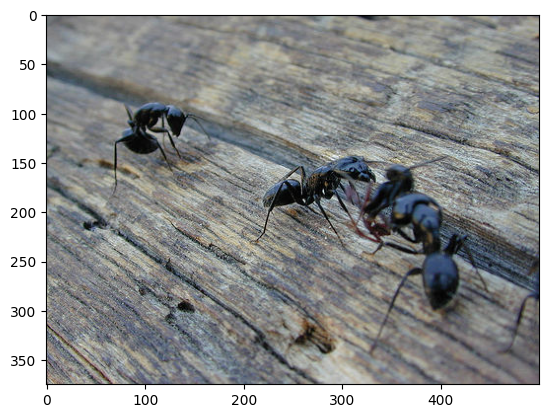

In [6]:
# display ant image
img = mpimg.imread('/content/ant_bee_images/ant (10).jpg')
imgplt = plt.imshow(img)
plt.show()

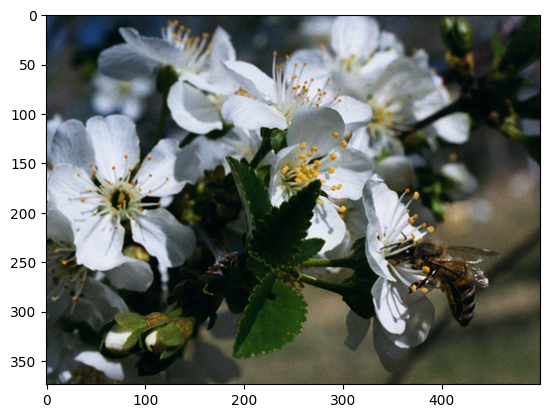

In [7]:
# display baby with jaundice
img = mpimg.imread('/content/ant_bee_images/bee (10).jpg')
imgplt = plt.imshow(img)
plt.show()

In [8]:
file_names = os.listdir('/content/ant_bee_images')

for i in range(5):

  name = file_names[i]
  print(name[0:3])



ant
bee
ant
ant
ant


In [9]:
file_names = os.listdir('/content/ant_bee_images')

ant_count = 0
bee_count = 0

for img_file in file_names:

  name = img_file[0:3]

  if name == 'ant':
    ant_count += 1

  else:
    bee_count += 1

print('Number of ant images =', ant_count)
print('Number of bee images =', bee_count)

Number of ant images = 191
Number of bee images = 203


Resizing all the images

In [10]:
#creating a directory for resized images
os.mkdir('/content/ant_bee_images resized')

In [11]:
original_folder = '/content/ant_bee_images'
resized_folder = '/content/ant_bee_images resized/'

for i in range(394):

  filename = os.listdir(original_folder)[i]
  #print(filename)
  #print(original_folder + '/' + filename)
  #/content/Data/normal (989).jpg
  img_path = original_folder + '/' + filename

  img = Image.open(img_path)
  img = img.resize((224, 224))
  img = img.convert('RGB')

  newImgPath = resized_folder + '/' + filename
  img.save(newImgPath)

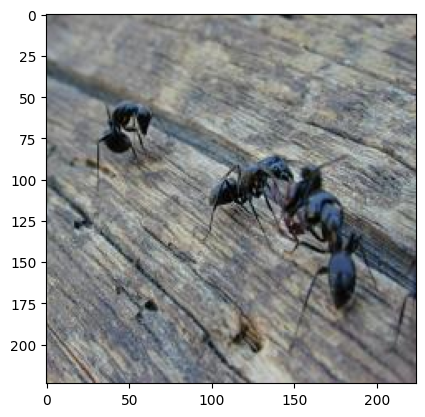

In [12]:
# display resized ant image
img = mpimg.imread('/content/ant_bee_images resized/ant (10).jpg')
imgplt = plt.imshow(img)
plt.show()

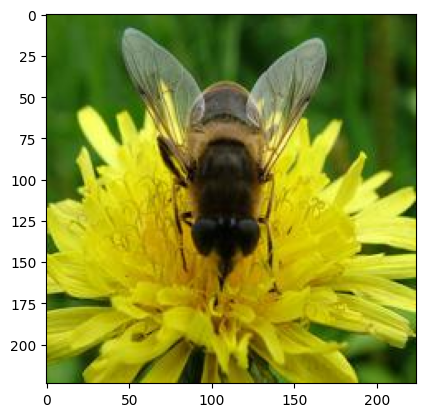

In [13]:
# display resized bee image
img = mpimg.imread('/content/ant_bee_images resized/bee (12).jpg')
imgplt = plt.imshow(img)
plt.show()

**Creating labels for resized images of Ants and Bees**

ant --> 0

bee --> 1

In [14]:
# creaing a for loop to assign labels
filenames = os.listdir('/content/ant_bee_images resized')


labels = []

for i in range(394):

  file_name = filenames[i]
  label = file_name[0:3]

  if label == 'bee':
    labels.append(1)

  else:
    labels.append(0)

In [15]:
print(filenames[0:3])
print(len(filenames))

['ant 105.jpg', 'bee (46).jpg', 'ant (72).jpg']
394


In [16]:
print(labels[0:5])
print(len(labels))

[0, 1, 0, 0, 0]
394


In [17]:
# counting the images of ant and bee out of 243
values, counts = np.unique(labels, return_counts=True)
print(values)
print(counts)

[0 1]
[191 203]


Converting all the resized images to numpy arrays

In [18]:
import cv2
import glob

In [19]:
image_directory = '/content/ant_bee_images resized/'
image_extension = ['jpg', 'jpeg']

files = []

[files.extend(glob.glob(image_directory + '*.' + e)) for e in image_extension]

ant_bee_images = np.asarray([cv2.imread(file) for file in files])

In [20]:
print(ant_bee_images)

[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]


 [[[ 21 151 255]
   [ 10 140 247]
   [  0 128 232]
   ...
   [ 11  41  22]
   [  7  37  18]
   [  3  33  14]]

  [[ 34 168 255]
   [ 30 164 255]
   [ 21 158 255]
   ...
   [ 11  41  22]
   [  6  36  17]
   [  2  32  13]]

  [[ 35 176 255]
   [ 38 179 255]
   [ 35 178 255]
   ...
   [ 10  40  21]
   [  5  35  16]
   [  1  31

In [21]:
type(ant_bee_images)

numpy.ndarray

In [22]:
print(ant_bee_images.shape)

(394, 224, 224, 3)


In [23]:
X = ant_bee_images
Y = np.asarray(labels)

**Train Test Split**

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=2)

In [25]:
print(X.shape, X_train.shape, X_test.shape)

(394, 224, 224, 3) (354, 224, 224, 3) (40, 224, 224, 3)


354 --> training images

40 --> test images

In [26]:
# scaling the data
X_train_scaled = X_train/255

X_test_scaled = X_test/255

In [27]:
print(X_train_scaled)

[[[[0.01568627 0.10980392 0.0627451 ]
   [0.01568627 0.10980392 0.0627451 ]
   [0.01568627 0.10980392 0.0627451 ]
   ...
   [0.14509804 0.24313725 0.22745098]
   [0.15686275 0.25490196 0.23921569]
   [0.16470588 0.2627451  0.24705882]]

  [[0.01568627 0.10980392 0.0627451 ]
   [0.01568627 0.10980392 0.0627451 ]
   [0.01568627 0.10980392 0.0627451 ]
   ...
   [0.14509804 0.24313725 0.22745098]
   [0.15686275 0.25490196 0.23921569]
   [0.16078431 0.25882353 0.24313725]]

  [[0.01568627 0.10980392 0.0627451 ]
   [0.01568627 0.10980392 0.0627451 ]
   [0.01568627 0.10980392 0.0627451 ]
   ...
   [0.14117647 0.23921569 0.22352941]
   [0.14901961 0.24705882 0.23137255]
   [0.15686275 0.25490196 0.23921569]]

  ...

  [[0.         0.         0.00392157]
   [0.         0.         0.00392157]
   [0.         0.         0.00392157]
   ...
   [0.26666667 0.28627451 0.38431373]
   [0.25882353 0.27843137 0.37647059]
   [0.25490196 0.2745098  0.37254902]]

  [[0.         0.         0.00392157]
   [0. 

**Building the Neural Network**

In [28]:
import tensorflow as tf
import tensorflow_hub as hub

In [41]:
mobilenet_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'

pretrained_model = hub.KerasLayer(mobilenet_model, input_shape=(None,224,224,3), trainable=False)

In [46]:
num_of_classes = 2

#model = tf.keras.Sequential([

#    pretrained_model,
#    tf.keras.layers.Dense(num_of_classes)

#])

#model = tf.keras.Sequential([
 #   pretrained_model,
    #tf.keras.layers.Dense(128, activation='relu'),
    #tf.keras.layers.Dropout(0.5),
    #tf.keras.layers.Dense(64, activation='relu'),
  #  tf.keras.layers.Dropout(0.5),
  #  tf.keras.layers.Dense(num_of_classes)
#])

model = tf.keras.Sequential()
model.add(tf.keras.layers.InputLayer(input_shape=(224,224,3))) # Add an input layer to match the pretrained model
model.add(tf.keras.layers.Lambda(lambda x: pretrained_model(x)))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(num_of_classes))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda (Lambda)                      │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 1280)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 2)                   │           2,562 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,562 (10.01 KB)

 Trainable params: 2,562 (10.01 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(
    optimizer = 'adam',
    loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics = ['acc']
)

In [48]:
# Early stopping callback
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

**Validation Data**

In [49]:
# extracting the compressed validation dataset
from zipfile import ZipFile

dataset = '/content/validation_data.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [50]:
# counting the number of files in val folder
path, dirs, files = next(os.walk('/content/validation_data'))
file_count = len(files)
print('Number of images: ', file_count)

Number of images:  153


In [51]:
#creating a directory for resized images
os.mkdir('/content/validation_data resized')

In [52]:
original_val_folder = '/content/validation_data'
resized_val_folder = '/content/validation_data resized/'

for i in range(153):

  filename_val = os.listdir(original_val_folder)[i]
  #print(filename)
  #print(original_folder + '/' + filename)
  #/content/Data/normal (989).jpg
  val_img_path = original_val_folder + '/' + filename_val

  val_img = Image.open(img_path)
  val_img = val_img.resize((224, 224))
  val_img = val_img.convert('RGB')

  newImgPath_val = resized_val_folder + '/' + filename_val
  val_img.save(newImgPath_val)

In [53]:
# creaing a for loop to assign labels
filenames_val = os.listdir('/content/validation_data resized')

labels_val = []

for i in range(153):
  file_name_val = filenames_val[i]
  label_val = file_name_val[0:3]

  if label_val == 'bee':
    labels_val.append(1)

  else:
    labels_val.append(0)

In [54]:
# counting the val images of ant and bee out of 153
values, counts = np.unique(labels_val, return_counts=True)
print(values)
print(counts)

[0 1]
[70 83]


In [55]:
image_directory_val = '/content/validation_data resized/'
image_extension_val = ['jpg', 'jpeg']

files_val = []

[files_val.extend(glob.glob(image_directory_val + '*.' + e)) for e in image_extension_val]

ant_bee_images_val = np.asarray([cv2.imread(file) for file in files_val])

In [56]:
print(ant_bee_images_val)
print(type(ant_bee_images_val))
print(ant_bee_images_val.shape)

[[[[206 166 191]
   [189 164 184]
   [156 159 174]
   ...
   [ 62 135 185]
   [ 64 135 185]
   [ 64 135 185]]

  [[203 166 192]
   [188 165 187]
   [158 161 176]
   ...
   [ 62 135 185]
   [ 64 135 185]
   [ 64 135 185]]

  [[194 167 193]
   [183 165 188]
   [160 161 181]
   ...
   [ 62 135 185]
   [ 64 135 185]
   [ 64 135 185]]

  ...

  [[105 170 198]
   [104 168 198]
   [101 166 197]
   ...
   [ 80 165 161]
   [ 80 165 161]
   [ 78 165 161]]

  [[106 172 197]
   [104 169 197]
   [101 166 197]
   ...
   [ 81 166 162]
   [ 81 166 162]
   [ 79 166 162]]

  [[106 172 197]
   [105 170 198]
   [102 167 198]
   ...
   [ 81 166 162]
   [ 81 166 162]
   [ 79 166 162]]]


 [[[206 166 191]
   [189 164 184]
   [156 159 174]
   ...
   [ 62 135 185]
   [ 64 135 185]
   [ 64 135 185]]

  [[203 166 192]
   [188 165 187]
   [158 161 176]
   ...
   [ 62 135 185]
   [ 64 135 185]
   [ 64 135 185]]

  [[194 167 193]
   [183 165 188]
   [160 161 181]
   ...
   [ 62 135 185]
   [ 64 135 185]
   [ 64 135

In [57]:
X_val = ant_bee_images_val
Y_val = np.asarray(labels_val)

print(X_val.shape)
print(Y_val.shape)

(153, 224, 224, 3)
(153,)


In [58]:
#X_train_val, X_test_val, Y_train_val, Y_test_val = train_test_split(X_val, Y_val, test_size=0.1, random_state=2)

In [59]:
#print(X_val.shape, X_train_val.shape, X_test_val.shape)

train data -> 137

test data -> 16

In [60]:
# scaling the data
#X_train_val_scaled = X_train_val/255
X_val_scaled = X_val/255

#X_test_val_scaled = X_test_val/255

In [62]:
#print(X_train_val_scaled, X_test_val_scaled)
print(X_val_scaled)

[[[[0.80784314 0.65098039 0.74901961]
   [0.74117647 0.64313725 0.72156863]
   [0.61176471 0.62352941 0.68235294]
   ...
   [0.24313725 0.52941176 0.7254902 ]
   [0.25098039 0.52941176 0.7254902 ]
   [0.25098039 0.52941176 0.7254902 ]]

  [[0.79607843 0.65098039 0.75294118]
   [0.7372549  0.64705882 0.73333333]
   [0.61960784 0.63137255 0.69019608]
   ...
   [0.24313725 0.52941176 0.7254902 ]
   [0.25098039 0.52941176 0.7254902 ]
   [0.25098039 0.52941176 0.7254902 ]]

  [[0.76078431 0.65490196 0.75686275]
   [0.71764706 0.64705882 0.7372549 ]
   [0.62745098 0.63137255 0.70980392]
   ...
   [0.24313725 0.52941176 0.7254902 ]
   [0.25098039 0.52941176 0.7254902 ]
   [0.25098039 0.52941176 0.7254902 ]]

  ...

  [[0.41176471 0.66666667 0.77647059]
   [0.40784314 0.65882353 0.77647059]
   [0.39607843 0.65098039 0.77254902]
   ...
   [0.31372549 0.64705882 0.63137255]
   [0.31372549 0.64705882 0.63137255]
   [0.30588235 0.64705882 0.63137255]]

  [[0.41568627 0.6745098  0.77254902]
   [0.4

In [66]:
# Train the model with validation and early stopping
#history = model.fit(X_train_val_scaled, Y_train_val, epochs=20, validation_data=(X_test_val_scaled, Y_test_val), callbacks=[early_stopping])

history = model.fit(X_train_scaled, Y_train, epochs=20, validation_data=(X_val_scaled, Y_val), callbacks=[early_stopping])
num_epochs = len(history.history['loss'])

Epoch 1/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 17s 1s/step - acc: 0.9330 - loss: 0.1748 - val_acc: 0.5425 - val_loss: 1.8948
Epoch 2/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 26s 2s/step - acc: 0.9222 - loss: 0.1848 - val_acc: 0.5425 - val_loss: 1.8392
Epoch 3/20
12/12 ━━━━━━━━━━━━━━━━━━━━ 90s 6s/step - acc: 0.9720 - loss: 0.1109 - val_acc: 0.5425 - val_loss: 1.7670


In [67]:
model.fit(X_train_scaled, Y_train, epochs=num_epochs)

Epoch 1/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 11s 858ms/step - acc: 0.9313 - loss: 0.1690
Epoch 2/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 21s 968ms/step - acc: 0.9472 - loss: 0.1658
Epoch 3/3
12/12 ━━━━━━━━━━━━━━━━━━━━ 20s 897ms/step - acc: 0.9278 - loss: 0.1703


In [68]:
score, acc = model.evaluate(X_test_scaled, Y_test)
print('Test Loss =', score)
print('Test Accuracy =', acc)

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 194ms/step - acc: 0.9187 - loss: 0.2631
Test Loss = 0.24714620411396027
Test Accuracy = 0.925000011920929


In [69]:
from sklearn.metrics import precision_score, f1_score

# Assuming you have your test data and model
# X_test_scaled is your test data features
# Y_test is your true labels for the test data

# Make predictions
Y_pred = model.predict(X_test_scaled)
Y_pred_classes = np.argmax(Y_pred, axis=1)  # Convert predictions to class labels if they are one-hot encoded

# Calculate precision
precision = precision_score(Y_test, Y_pred_classes, average='weighted')

# Calculate F1 score
f1 = f1_score(Y_test, Y_pred_classes, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"F1 Score: {f1:.4f}")

2/2 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step
Precision: 0.9269
F1 Score: 0.9253


**Predictive System**

Path of the image to be predicted: /content/two-bees-by-flowers-2.jpg


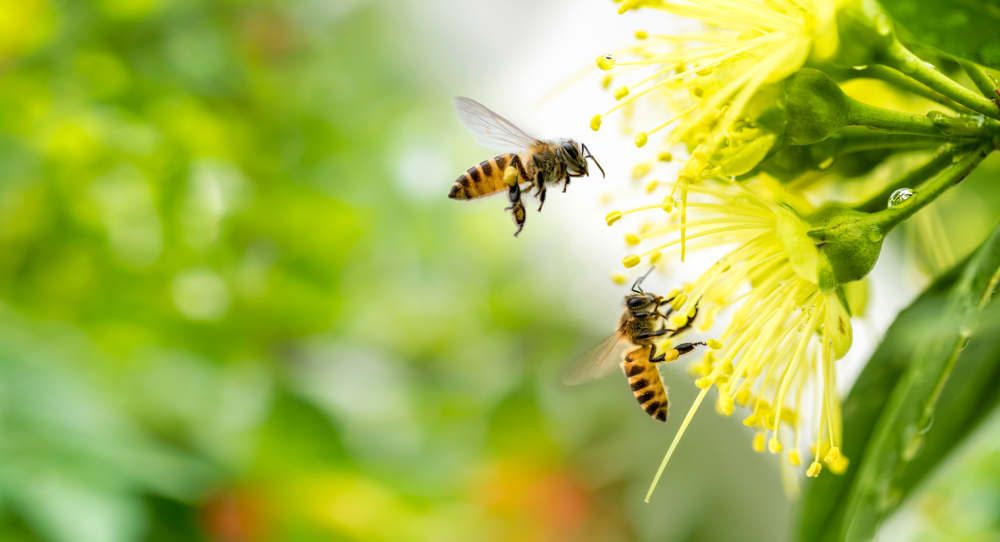

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
[[-1.1545663   0.67875606]]
1
The image represents a bee.


In [70]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents an ant.')

else:
  print('The image represents a bee.')

Path of the image to be predicted: /content/test_ant.jpg


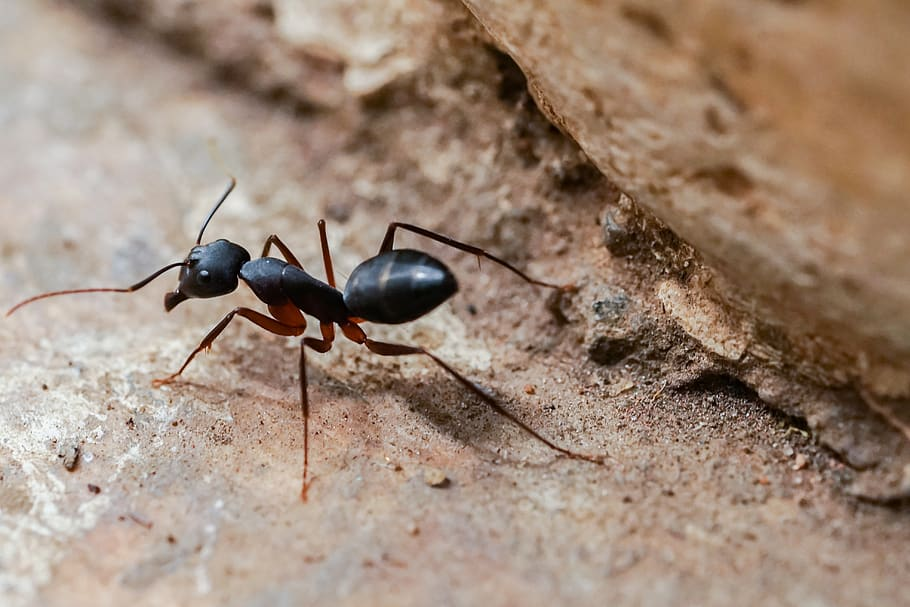

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
[[ 2.4267123 -2.6017985]]
0
The image represents an ant


In [75]:
input_image_path = input('Path of the image to be predicted: ')

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resize = cv2.resize(input_image, (224,224))

input_image_scaled = input_image_resize/255

image_reshaped = np.reshape(input_image_scaled, [1,224,224,3])

input_prediction = model.predict(image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 0:
  print('The image represents an ant')

else:
  print('The image represents a bee')